In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [71]:
arrests = pd.read_csv('Arrests.csv')
crimes = pd.read_csv('Crimes.csv')
arrests.columns=["cb_no","case_number","arrest_date","race","charge_1_statute","charge_1_description","charge_1_type","charge_1_class","charge_2_statute","charge_2_description","charge_2_type","charge_2_class","charge_3_statute","charge_3_description","charge_3_type","charge_3_class","charge_4_statute","charge_4_description","charge_4_type","charge_4_class","charges_statute","charges_description","charges_type","charges_class","boundaries_zip_codes","community_areas","zip_codes","census_tracts","wards"]
crimes.columns=["id","case_number","date","block","iucr","primary_type","description","location_description","arrest","domestic","beat","district","ward","community_area","fbi_code","x_coordinate","y_coordinate","year","updated_on","latitude","longitude","location","historical_wards_2003_2015","zip_codes","community_areas","census_tracts","wards","boundaries_zip_codes","police_districts","police_beats","wards_2023"]

#arrests=arrests[arrests['case_number'] != '']
arrests['arrest_date'] = pd.to_datetime(arrests['arrest_date'], format='%m/%d/%Y %I:%M:%S %p')
arrests['year'] = arrests['arrest_date'].dt.year

In [46]:
arrests.head(5)

,cb_no,case_number,arrest_date,race,charge_1_statute,charge_1_description,charge_1_type,charge_1_class,charge_2_statute,charge_2_description,...,charges_statute,charges_description,charges_type,charges_class,boundaries_zip_codes,community_areas,zip_codes,census_tracts,wards,year
0,30293871,JG486495,2023-10-31 09:07:00,BLACK,430 ILCS 66.0/10-H,FCCL FL DISCL CONCEALED FIR,M,B,NaN,NaN,...,430 ILCS 66.0/10-H | | |,FCCL FL DISCL CONCEALED FIR | | |,M | | |,B | | |,NaN,NaN,NaN,NaN,NaN,2023
1,30293867,JG486562,2023-10-31 23:45:00,BLACK,720 ILCS 570.0/402-C,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D),F,4,7-24-099(B)(4),POSS CANNABIS IN PRIV VEH NOT IN SEALED CONTAINER,...,720 ILCS 570.0/402-C | 7-24-099(B)(4) | |,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)...,F | | |,4 | L | |,NaN,NaN,NaN,NaN,NaN,2023
2,30293859,JG483980,2023-10-31 22:00:00,BLACK,720 ILCS 5.0/21-2-A,CRIM TRES TO VEH/PHY CONTROL,M,A,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,...,720 ILCS 5.0/21-2-A | 725 ILCS 5.0/110-3 | |,CRIM TRES TO VEH/PHY CONTROL | ISSUANCE OF WAR...,M | | |,A | Z | |,NaN,NaN,NaN,NaN,NaN,2023
3,30293858,JG486446,2023-10-31 20:36:00,WHITE HISPANIC,720 ILCS 5.0/12-3-A-1,BATTERY - CAUSE BODILY HARM,M,A,NaN,NaN,...,720 ILCS 5.0/12-3-A-1 | | |,BATTERY - CAUSE BODILY HARM | | |,M | | |,A | | |,NaN,NaN,NaN,NaN,NaN,2023
4,30293857,JG486537,2023-10-31 22:42:00,BLACK,720 ILCS 570.0/402-C,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D),F,4,4-64-350,CERTAIN TRANSACTIONS - PROHIBITED,...,720 ILCS 570.0/402-C | 4-64-350 | |,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)...,F | | |,4 | L | |,NaN,NaN,NaN,NaN,NaN,2023


In [32]:
print("Arrests columns")
a=""
for col in arrests.columns:
    a+=col
    a+=","
print(a)
print("\nCrimes columns")
c=""
for col in crimes.columns:
    c+=col
    c+=","
print(c)

Arrests columns
cb_no,case_number,arrest_date,race,charge_1_statute,charge_1_description,charge_1_type,charge_1_class,charge_2_statute,charge_2_description,charge_2_type,charge_2_class,charge_3_statute,charge_3_description,charge_3_type,charge_3_class,charge_4_statute,charge_4_description,charge_4_type,charge_4_class,charges_statute,charges_description,charges_type,charges_class,boundaries_zip_codes,community_areas,zip_codes,census_tracts,wards,

Crimes columns
id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,historical_wards_2003_2015,zip_codes,community_areas,census_tracts,wards,boundaries_zip_codes,police_districts,police_beats,wards_2023,


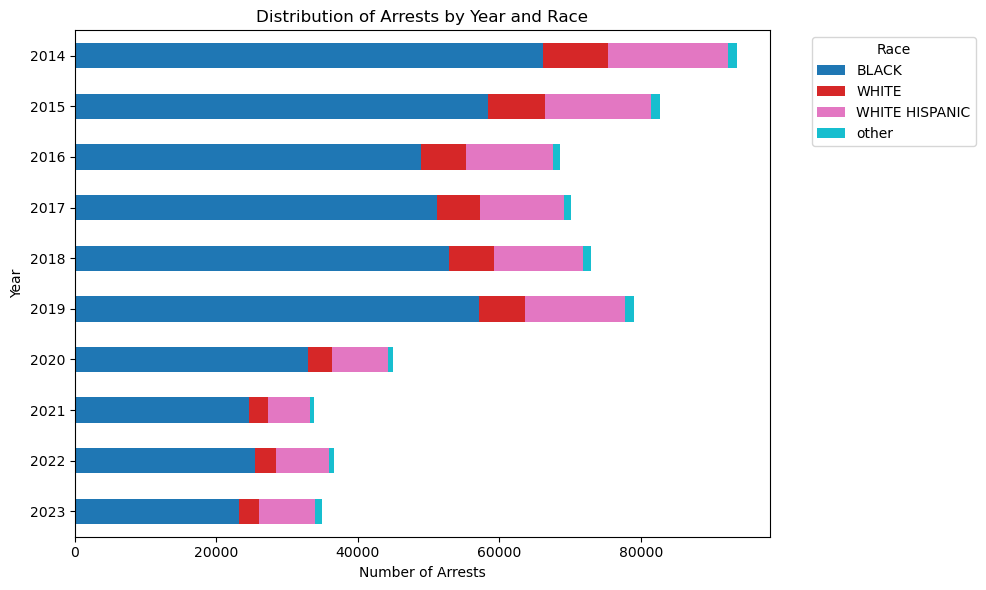

In [72]:
races_to_keep = ['BLACK', 'WHITE HISPANIC', 'WHITE']
arrests['race_updt'] = arrests['race'].where(arrests['race'].isin(races_to_keep), 'other')

pivot_df = arrests.groupby(['year', 'race_updt']).size().unstack().fillna(0)
pivot_df = pivot_df.sort_index(ascending=False)

pivot_df.plot(kind='barh', stacked=True, figsize=(10, 6), cmap='tab10')
plt.title('Distribution of Arrests by Year and Race')
plt.xlabel('Number of Arrests')
plt.ylabel('Year')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

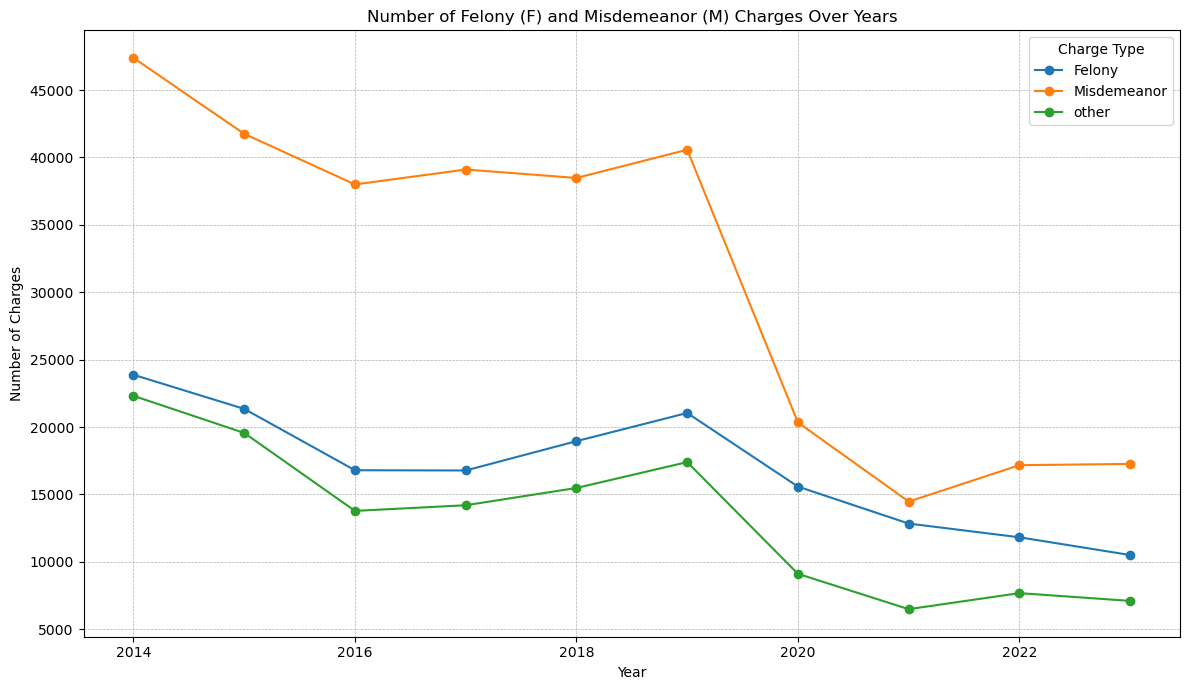

In [73]:
charges_to_keep = ['F', 'M']
arrests['charge_updt'] = arrests['charge_1_type'].where(arrests['charge_1_type'].isin(charges_to_keep), 'other')
charge_counts_by_year = arrests.groupby(['year', 'charge_updt']).size().unstack().fillna(0)
charge_counts_by_year = charge_counts_by_year.rename(columns={'F': 'Felony', 'M': 'Misdemeanor'})

charge_counts_by_year.plot(figsize=(12, 7), marker='o')
plt.title('Number of Felony (F) and Misdemeanor (M) Charges Over Years')
plt.ylabel('Number of Charges')
plt.xlabel('Year')
plt.legend(title='Charge Type')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

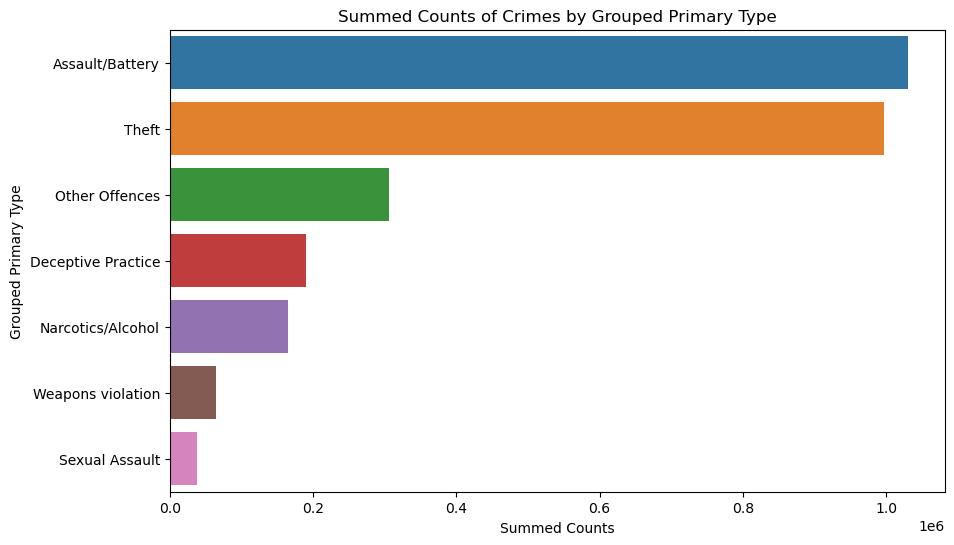

In [89]:
type_mapping = {
    'CRIMINAL SEXUAL ASSAULT': 'Sexual Assault',
    'SEX OFFENSE': 'Sexual Assault',
    'PROSTITUTION': 'Sexual Assault',
    'OBSCENITY': 'Sexual Assault',
    'PUBLIC INDECENCY': 'Sexual Assault',
    'CRIM SEXUAL ASSAULT': 'Sexual Assault',
    'ASSAULT': 'Assault/Battery',
    'BATTERY': 'Assault/Battery',
    'CRIMINAL DAMAGE': 'Assault/Battery',
    'HOMICIDE': 'Assault/Battery',
    'THEFT': 'Theft',
    'ROBBERY': 'Theft',
    'MOTOR VEHICLE THEFT': 'Theft',
    'BURGLARY': 'Theft',
    'NARCOTICS': 'Narcotics/Alcohol',
    'OTHER NARCOTIC VIOLATION': 'Narcotics/Alcohol',
    'LIQUOR LAW VIOLATION': 'Narcotics/Alcohol',
    'DECEPTIVE PRACTICE': 'Deceptive Practice',
    'OTHER OFFENSE': 'Other Offences',
    'CRIMINAL TRESPASS': 'Other Offences',
    'INTERFERENCE WITH PUBLIC OFFICER': 'Other Offences',
    'PUBLIC PEACE VIOLATION': 'Other Offences',
    'OFFENSE INVOLVING CHILDREN': 'Other Offences',
    'ARSON': 'Other Offences',
    'GAMBLING': 'Other Offences',
    'STALKING': 'Other Offences',
    'KIDNAPPING': 'Other Offences',
    'HUMAN TRAFFICKING': 'Other Offences',
    'INTIMIDATION': 'Other Offences',
    'WEAPONS VIOLATION': 'Weapons violation',
    'CONCEALED CARRY LICENSE VIOLATION': 'Weapons violation'
}

# Create a new 'grouped_primary_type' column using the mapping
crimes['grouped_primary_type'] = crimes['primary_type'].map(type_mapping).dropna()

# Now, group by this new column and sum the counts
grouped_counts = crimes['grouped_primary_type'].value_counts()

# Plot the horizontal bar chart with the bars in decreasing order
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_counts.values, y=grouped_counts.index)

plt.title('Summed Counts of Crimes by Grouped Primary Type')
plt.xlabel('Summed Counts')
plt.ylabel('Grouped Primary Type')
plt.show()


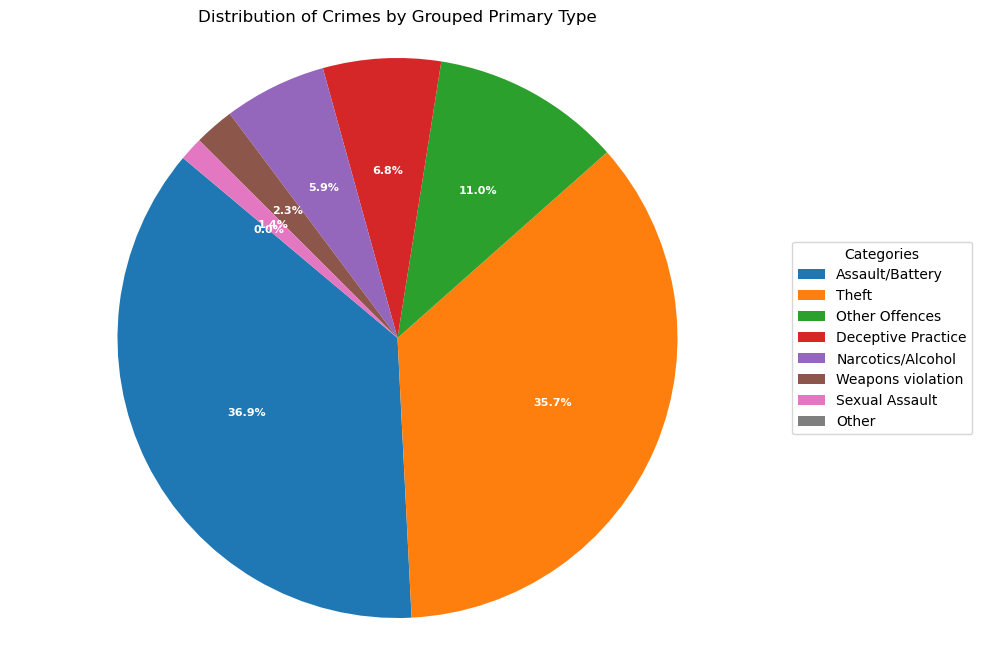

In [84]:
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    grouped_counts,
    autopct='%1.1f%%',
    startangle=140,
    textprops=dict(color="w")
)

# Here we create the legend, by referencing the wedges, and using the labels from grouped_counts.index
ax.legend(wedges, grouped_counts.index,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Crimes by Grouped Primary Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Optional: to move the percentage texts inside the wedges, you can set a smaller font size or adjust their positions.
plt.setp(autotexts, size=8, weight="bold")

plt.show()

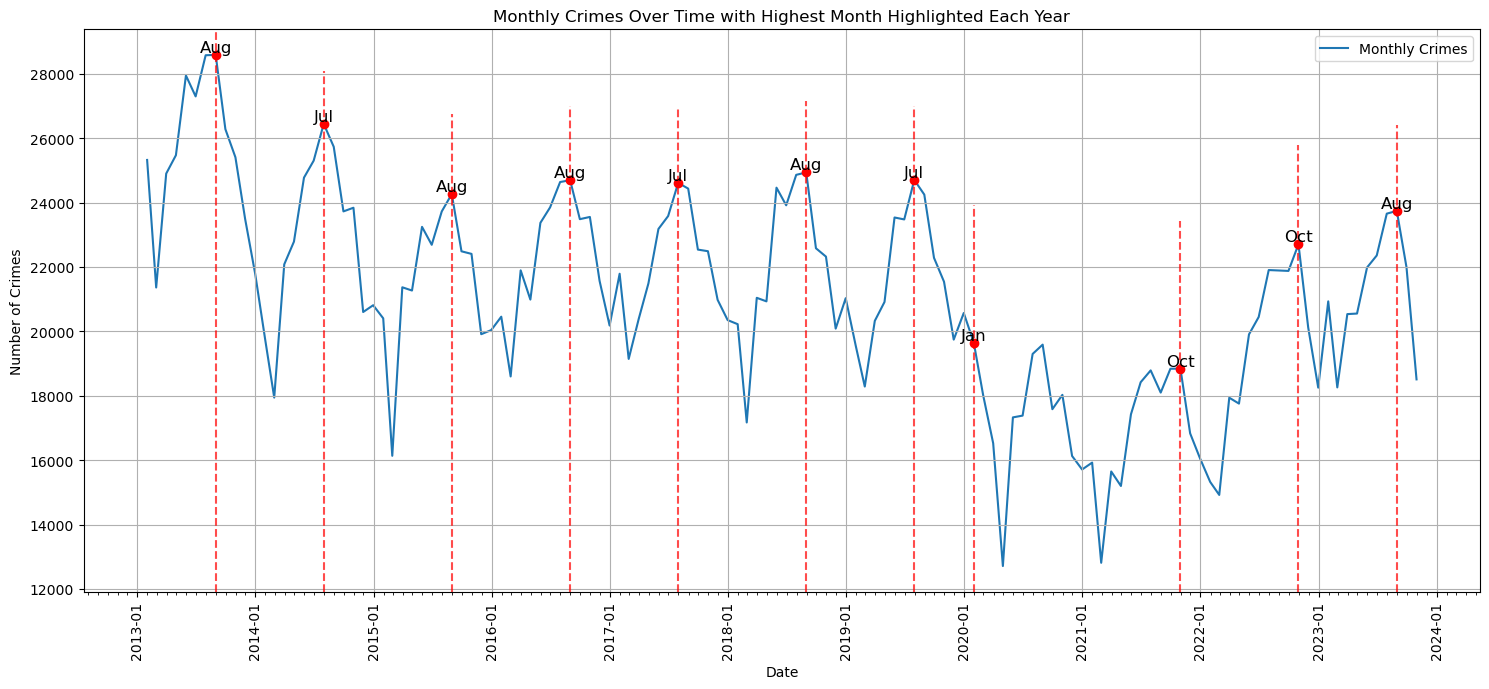

In [102]:
import pandas as pd

# Resample the data by month and count the number of crimes
monthly_crimes = crimes.resample('M').size()

# Find the month with the highest number of crimes for each year
annual_max = monthly_crimes.resample('A').max()

# Find which month had the max for each year
max_crime_months = monthly_crimes[monthly_crimes.isin(annual_max)]

# Plot the monthly crimes
plt.figure(figsize=(15, 7))
plt.plot(monthly_crimes.index, monthly_crimes, label='Monthly Crimes', zorder=1)

# Highlight the months with the highest crimes with a different style
for date, value in max_crime_months.items():
    plt.scatter(date, value, color='red', zorder=2)  # Red dot for maximum points
    plt.axvline(x=date, color='red', linestyle='--', alpha=0.7, ymin=0, ymax=(value/monthly_crimes.max()), zorder=2)
    
    # Annotate the month near the red dot
    plt.text(date, value, date.strftime('%b'), color='black', fontsize=12, ha='center', va='bottom')

# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.title('Monthly Crimes Over Time with Highest Month Highlighted Each Year')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()
